In [65]:
options(warn=-1)

In [66]:
library(tree)
library(ISLR)
library(repr)
library(MASS)
library(randomForest)
library(gbm)

# Fitting Classification Trees

In [6]:
High = ifelse(Carseats$Sales <= 8, 'No', 'Yes')
Carseats = data.frame(Carseats, High)
Carseats$High = as.factor(Carseats$High)

In [8]:
tree.carseats = tree(High ~ . - Sales, data = Carseats)
summary(tree.carseats)


Classification tree:
tree(formula = High ~ . - Sales, data = Carseats)
Variables actually used in tree construction:
[1] "ShelveLoc"   "Price"       "Income"      "CompPrice"   "Population" 
[6] "Advertising" "Age"         "US"         
Number of terminal nodes:  27 
Residual mean deviance:  0.4575 = 170.7 / 373 
Misclassification error rate: 0.09 = 36 / 400 

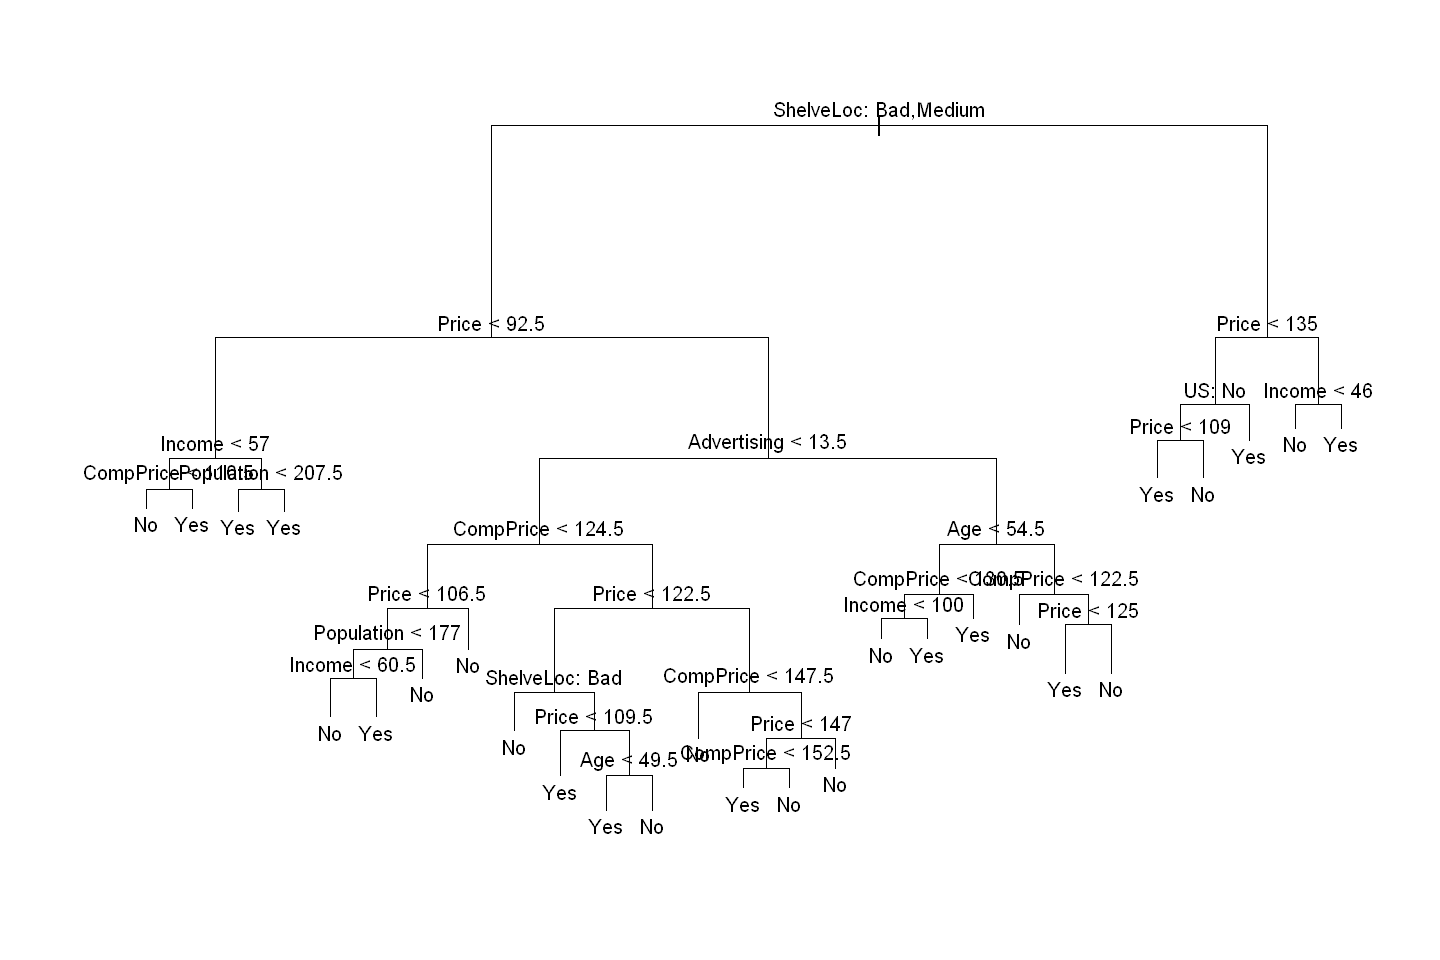

In [20]:
options(repr.plot.width=12, repr.plot.height=8)

plot(tree.carseats)
text(tree.carseats, pretty = 0)

In [21]:
tree.carseats

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

  1) root 400 541.500 No ( 0.59000 0.41000 )  
    2) ShelveLoc: Bad,Medium 315 390.600 No ( 0.68889 0.31111 )  
      4) Price < 92.5 46  56.530 Yes ( 0.30435 0.69565 )  
        8) Income < 57 10  12.220 No ( 0.70000 0.30000 )  
         16) CompPrice < 110.5 5   0.000 No ( 1.00000 0.00000 ) *
         17) CompPrice > 110.5 5   6.730 Yes ( 0.40000 0.60000 ) *
        9) Income > 57 36  35.470 Yes ( 0.19444 0.80556 )  
         18) Population < 207.5 16  21.170 Yes ( 0.37500 0.62500 ) *
         19) Population > 207.5 20   7.941 Yes ( 0.05000 0.95000 ) *
      5) Price > 92.5 269 299.800 No ( 0.75465 0.24535 )  
       10) Advertising < 13.5 224 213.200 No ( 0.81696 0.18304 )  
         20) CompPrice < 124.5 96  44.890 No ( 0.93750 0.06250 )  
           40) Price < 106.5 38  33.150 No ( 0.84211 0.15789 )  
             80) Population < 177 12  16.300 No ( 0.58333 0.41667 )  
              160) Income < 60.5 6   0

In [22]:
set.seed(2)
train = sample(1:nrow(Carseats), 200)

In [24]:
Carseats.test = Carseats[-train, ]
High.test = High[-train]

tree.carseats = tree(High ~ . - Sales, Carseats, subset = train)
tree.pred = predict(tree.carseats, Carseats.test, type = 'class')

In [25]:
table(tree.pred, High.test)

         High.test
tree.pred  No Yes
      No  102  31
      Yes  15  52

In [26]:
set.seed(3)
cv.carseats = cv.tree(tree.carseats, FUN = prune.misclass)

In [28]:
cv.carseats

$size
[1] 21 19 14  9  8  5  3  2  1

$dev
[1] 74 76 81 81 75 77 78 85 81

$k
[1] -Inf  0.0  1.0  1.4  2.0  3.0  4.0  9.0 18.0

$method
[1] "misclass"

attr(,"class")
[1] "prune"         "tree.sequence"

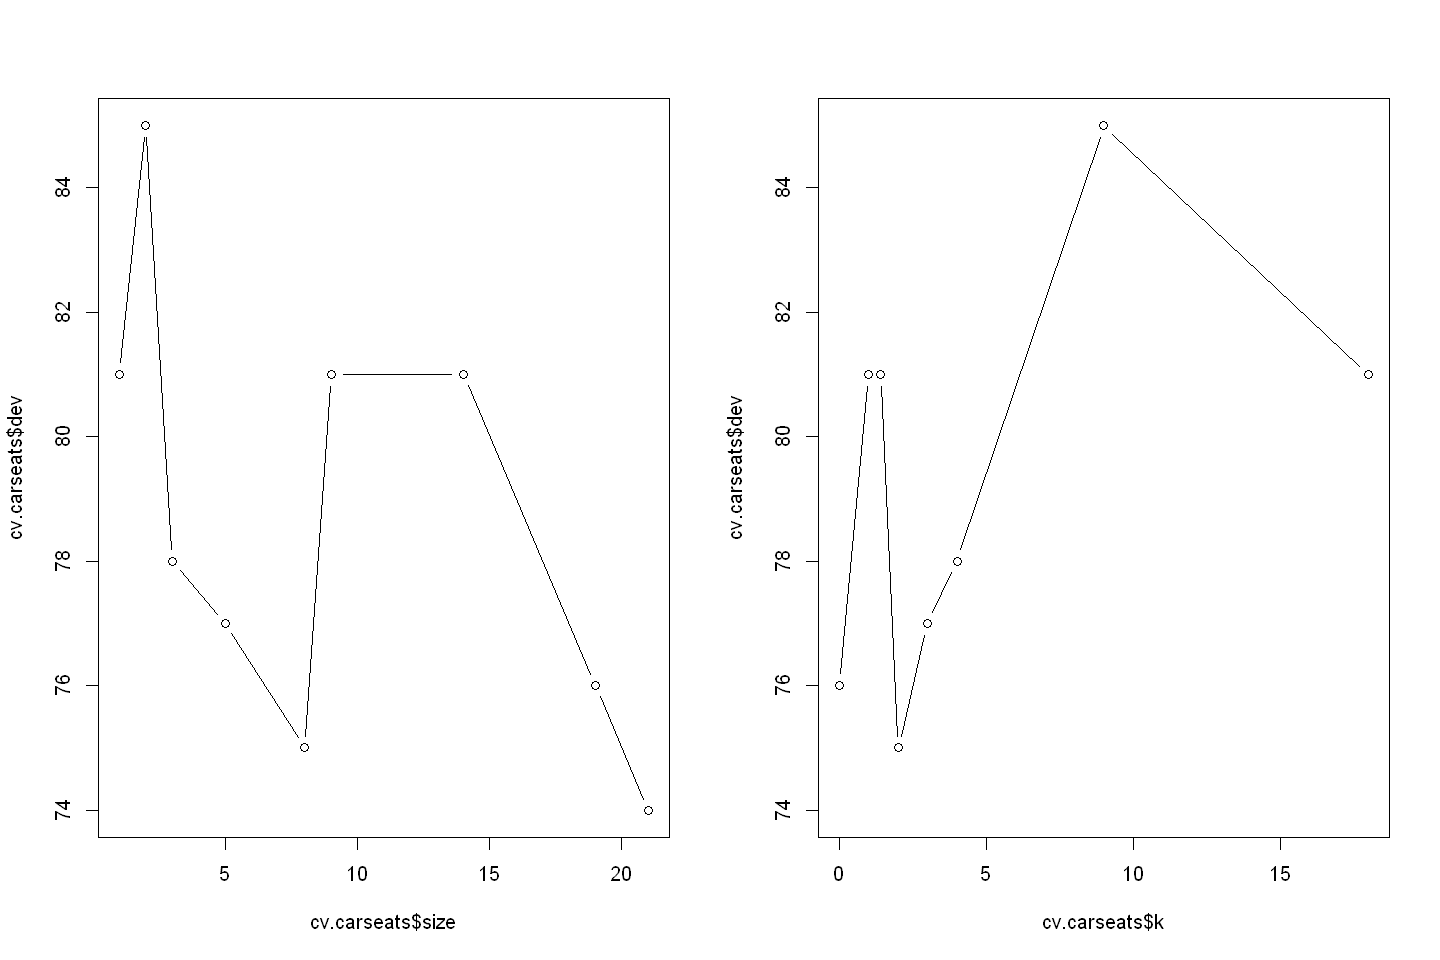

In [29]:
par(mfrow = c(1, 2))
plot(cv.carseats$size, cv.carseats$dev, type = 'b')
plot(cv.carseats$k, cv.carseats$dev, type = 'b')

In [30]:
prune.carseats = prune.misclass(tree.carseats, best = 21)

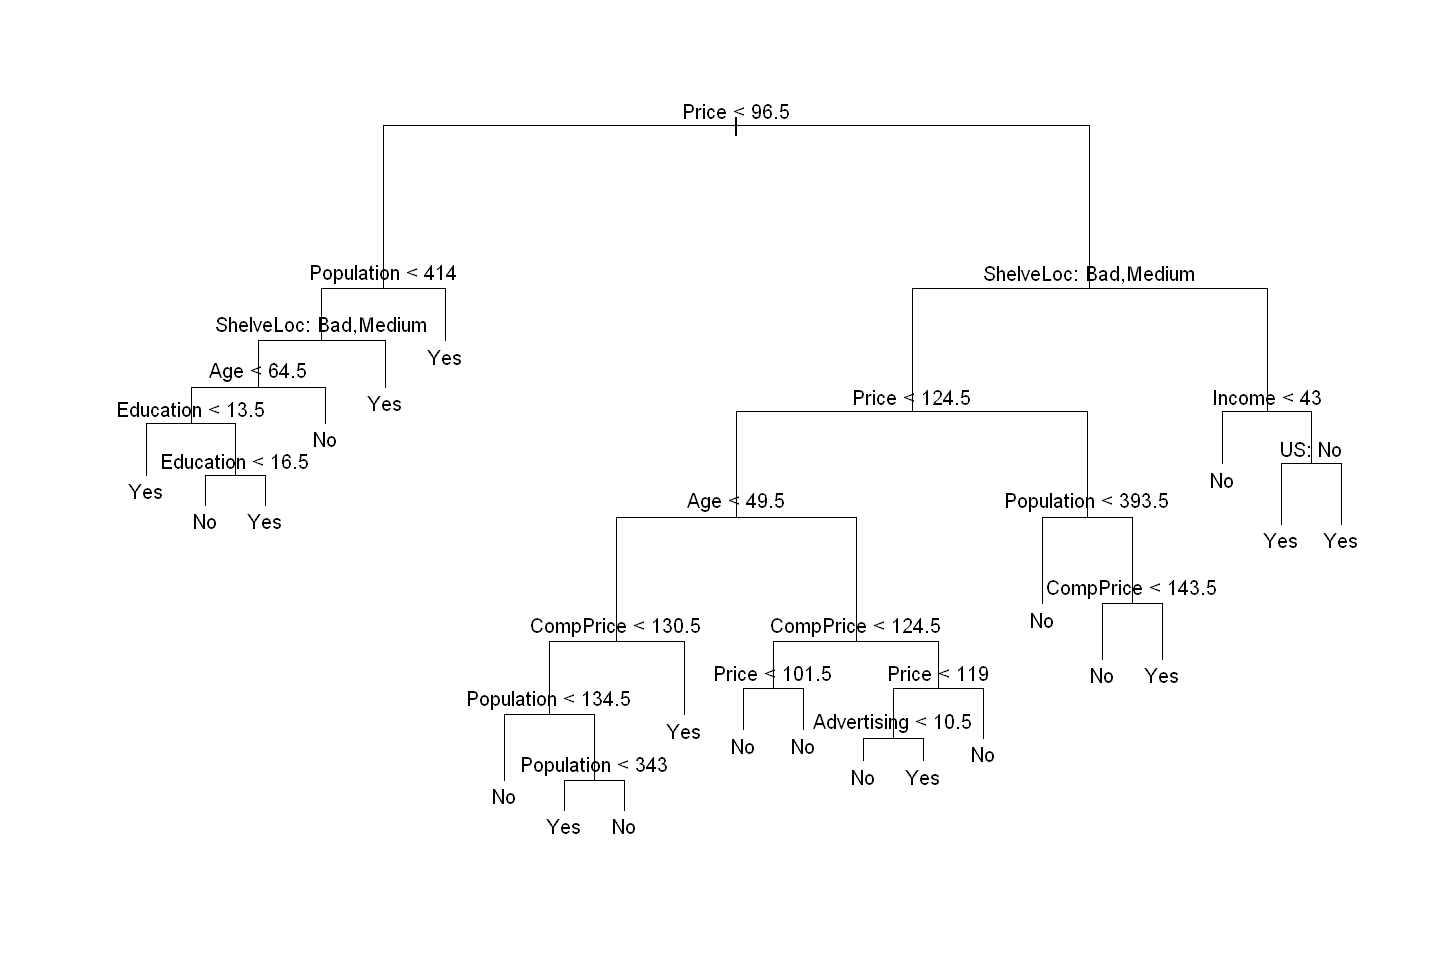

In [31]:
plot(prune.carseats)
text(prune.carseats, pretty = 0)

In [32]:
tree.pred = predict(prune.carseats, Carseats.test, type = 'class')
table(tree.pred, High.test)

         High.test
tree.pred  No Yes
      No  104  32
      Yes  13  51

In [33]:
prune.carseats = prune.misclass(tree.carseats, best = 15)

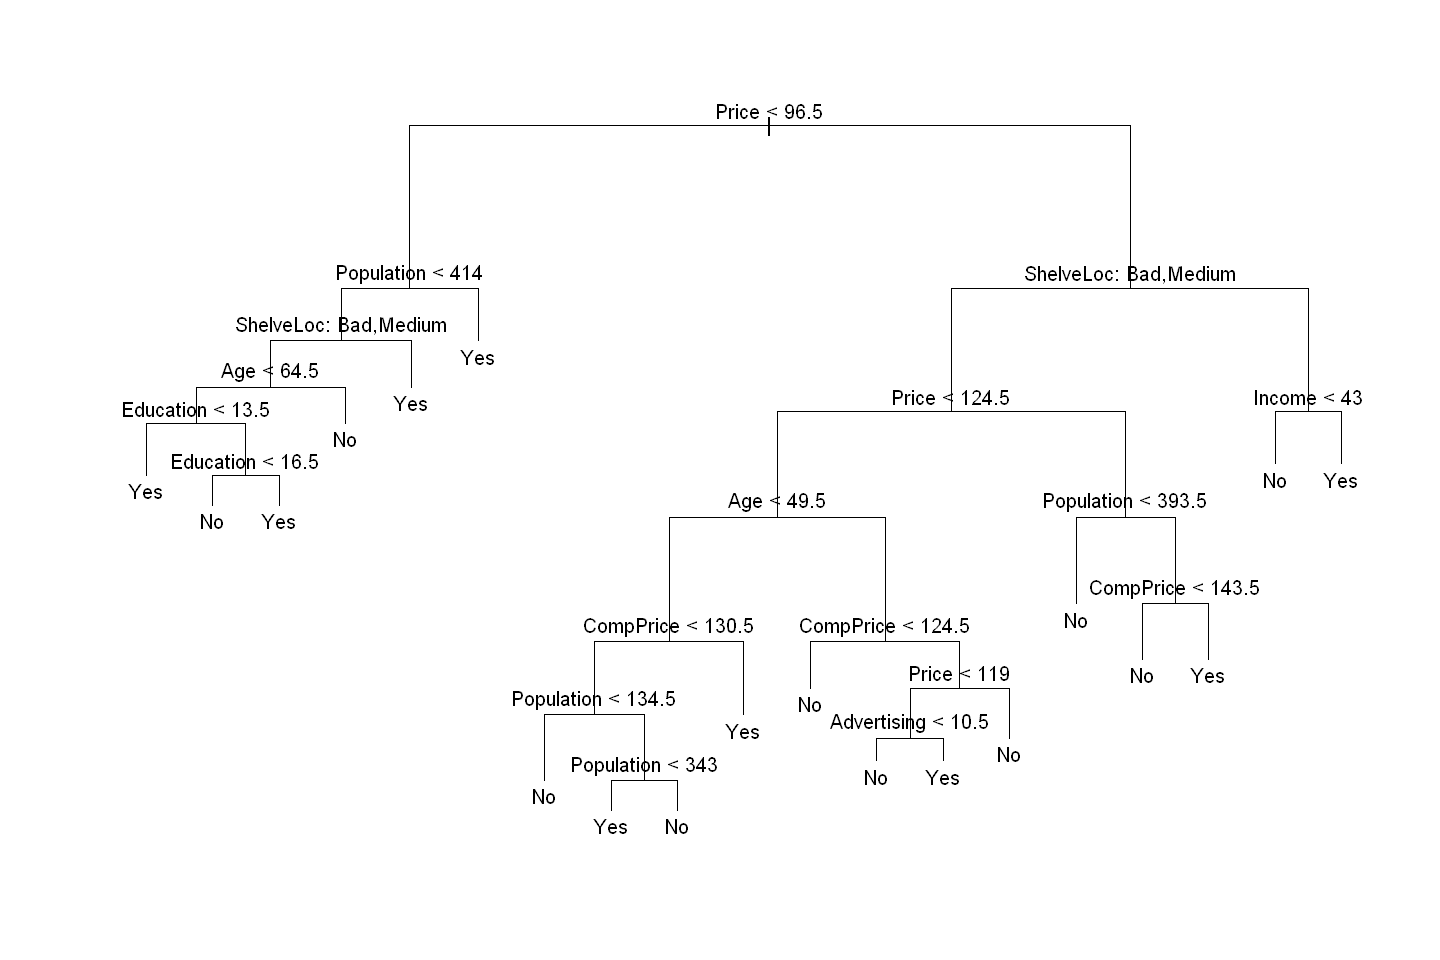

In [34]:
plot(prune.carseats)
text(prune.carseats, pretty = 0)

In [35]:
tree.pred = predict(prune.carseats, Carseats.test, type = 'class')
table(tree.pred, High.test)

         High.test
tree.pred  No Yes
      No  102  30
      Yes  15  53

# Fitting Regression Trees

In [37]:
set.seed(1)
train = sample(1:nrow(Boston), nrow(Boston) / 2)

In [38]:
tree.boston = tree(medv ~ ., Boston, subset = train)
summary(tree.boston)


Regression tree:
tree(formula = medv ~ ., data = Boston, subset = train)
Variables actually used in tree construction:
[1] "rm"    "lstat" "crim"  "age"  
Number of terminal nodes:  7 
Residual mean deviance:  10.38 = 2555 / 246 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-10.1800  -1.7770  -0.1775   0.0000   1.9230  16.5800 

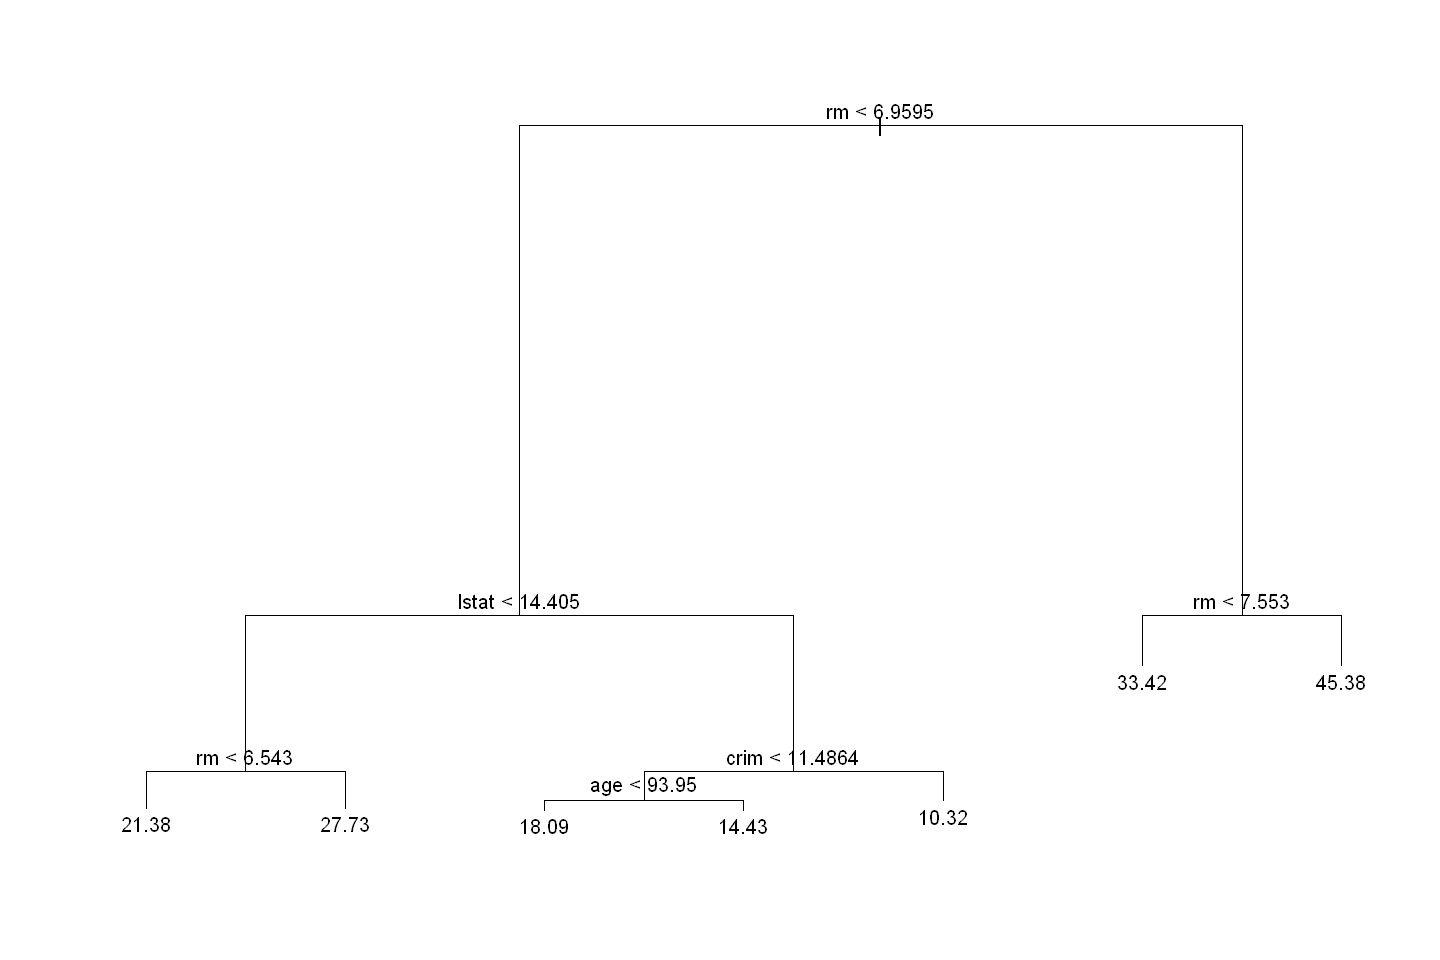

In [39]:
plot(tree.boston)
text(tree.boston, pretty = 0)

In [40]:
cv.boston = cv.tree(tree.boston)

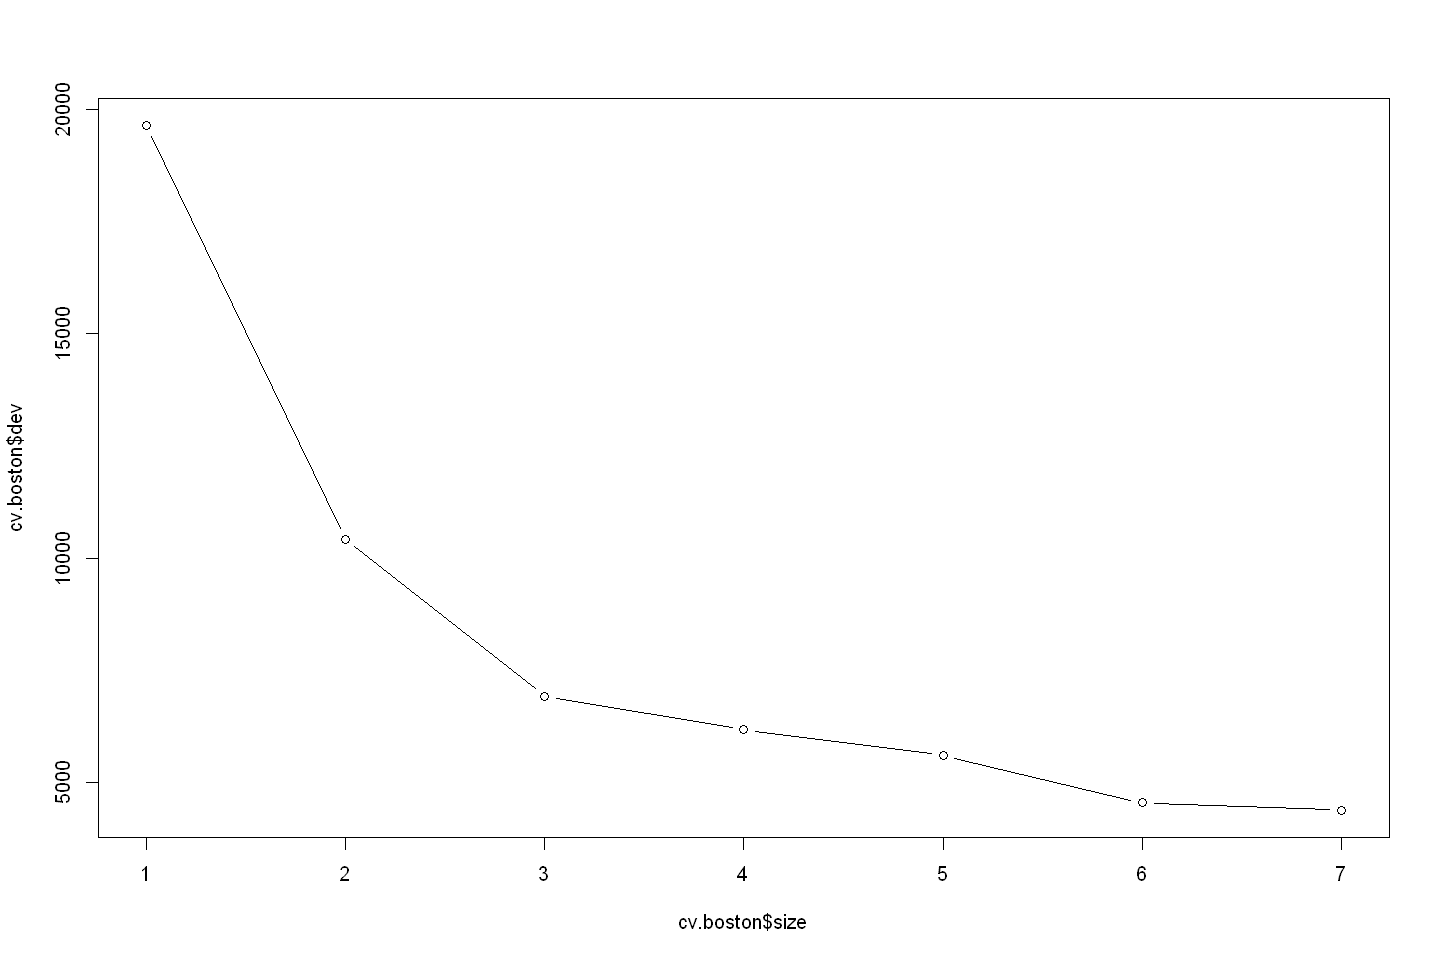

In [41]:
plot(cv.boston$size, cv.boston$dev, type = 'b')

In [42]:
prune.boston = prune.tree(tree.boston, best = 5)

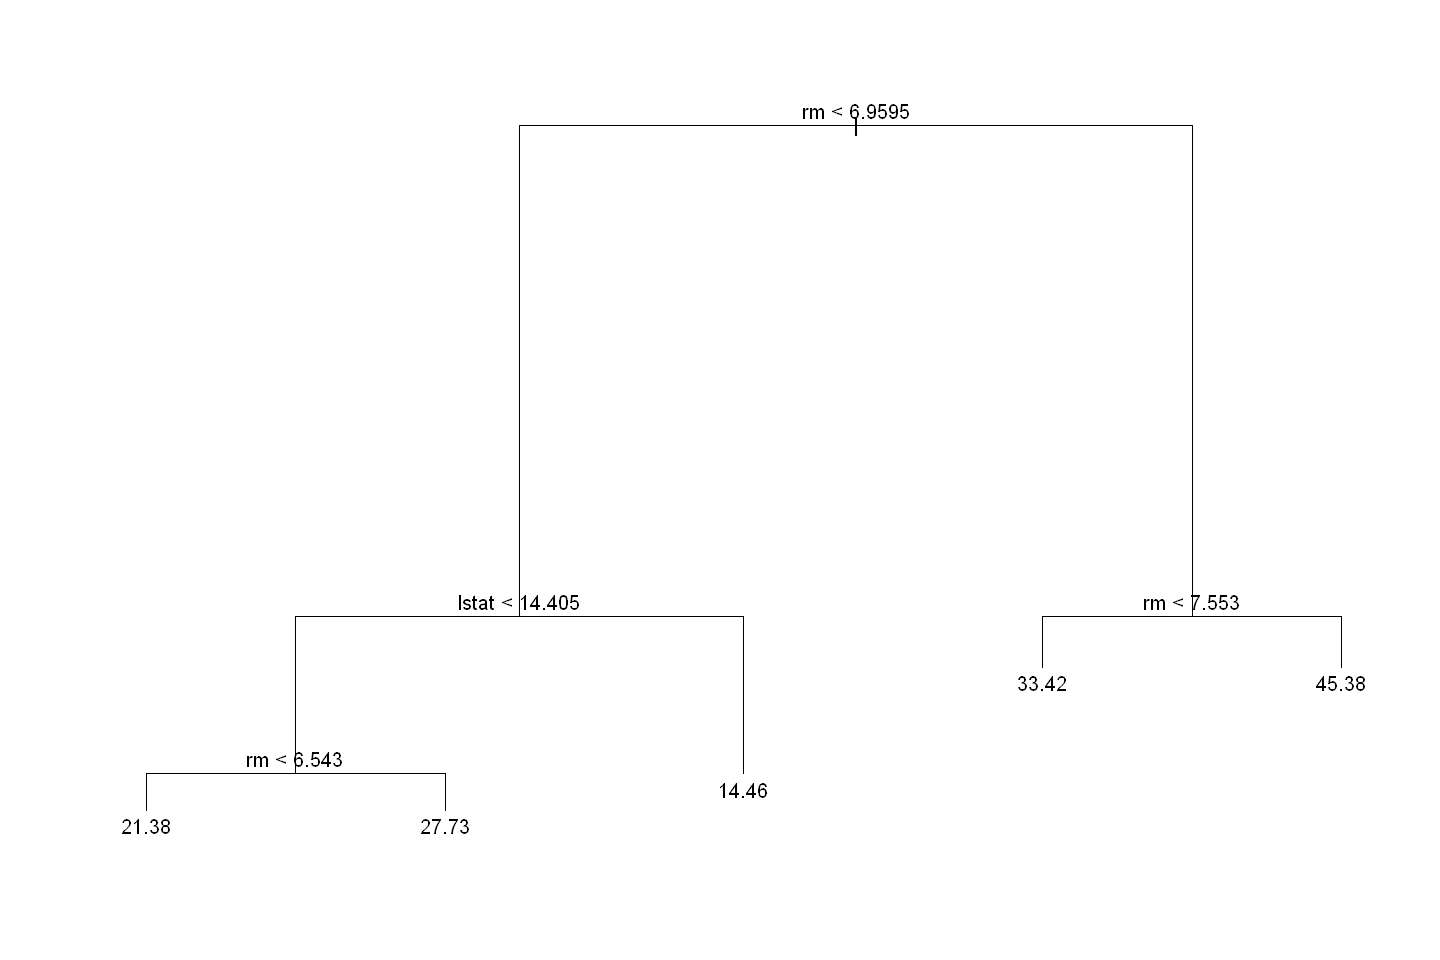

In [44]:
plot(prune.boston)
text(prune.boston, pretty = 0)

In [45]:
yhat = predict(tree.boston, newdata = Boston[-train,])
boston.test = Boston[-train, 'medv']

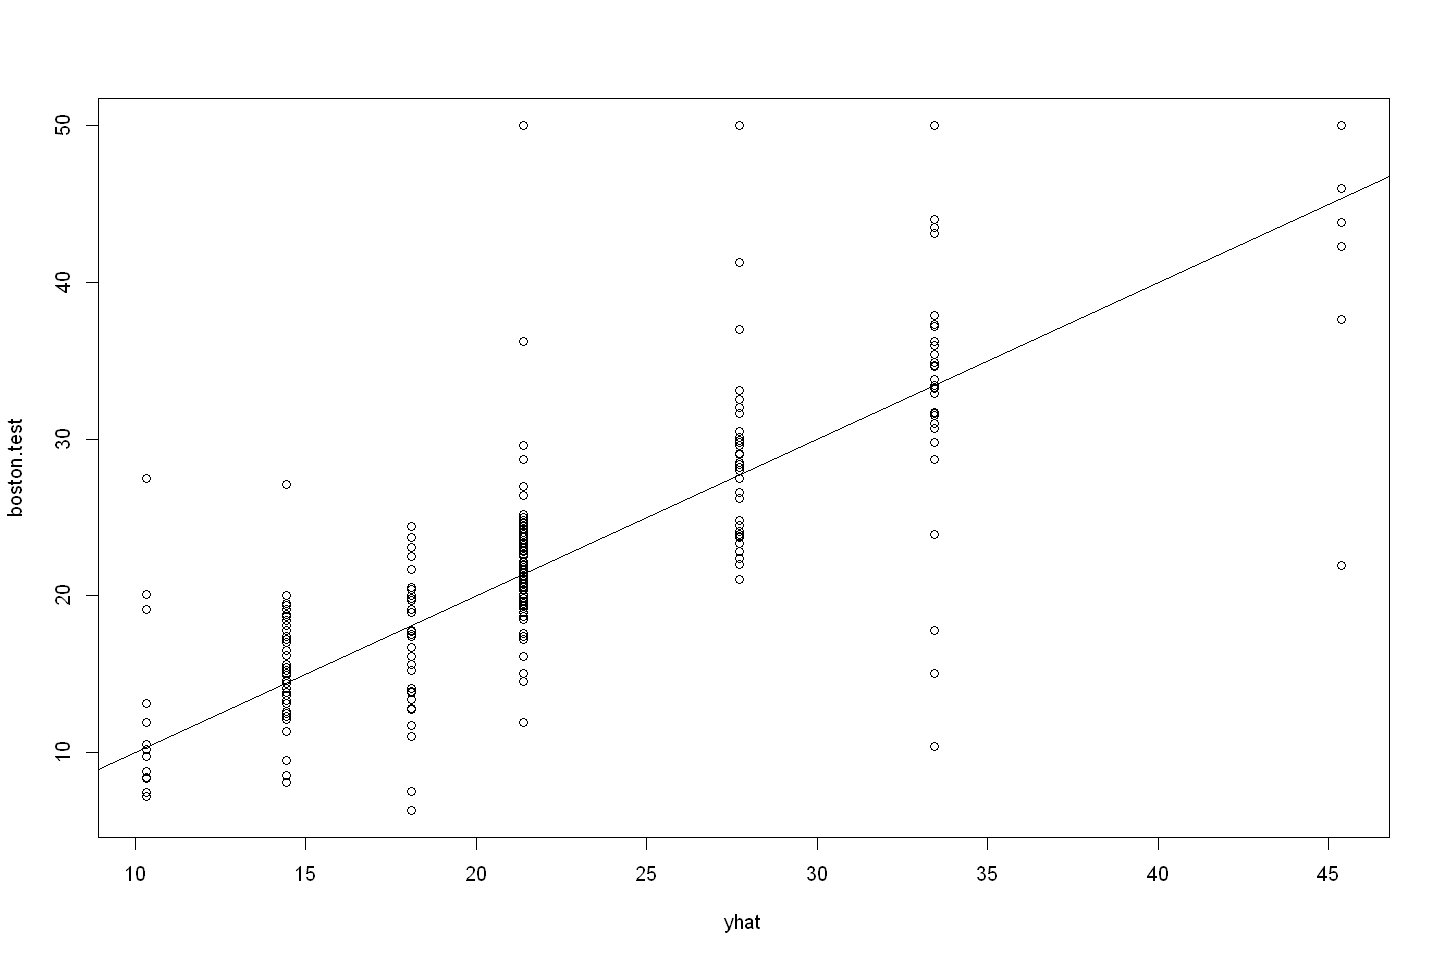

In [46]:
plot(yhat, boston.test)
abline(0, 1)

In [47]:
mean((yhat - boston.test) ^ 2)

[1] 35.28688

# Bagging and Random Forests

In [51]:
train = sample(1:nrow(Boston), nrow(Boston) / 2)
boston.test = Boston[-train, 'medv']

In [53]:
set.seed(1)
bag.boston = randomForest(medv ~ ., data = Boston, subset = train, mtry = 13, importance = TRUE)

In [54]:
bag.boston


Call:
 randomForest(formula = medv ~ ., data = Boston, mtry = 13, importance = TRUE,      subset = train) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 13

          Mean of squared residuals: 14.45243
                    % Var explained: 81.83

In [55]:
yhat.bag = predict(bag.boston, newdata = Boston[-train,])

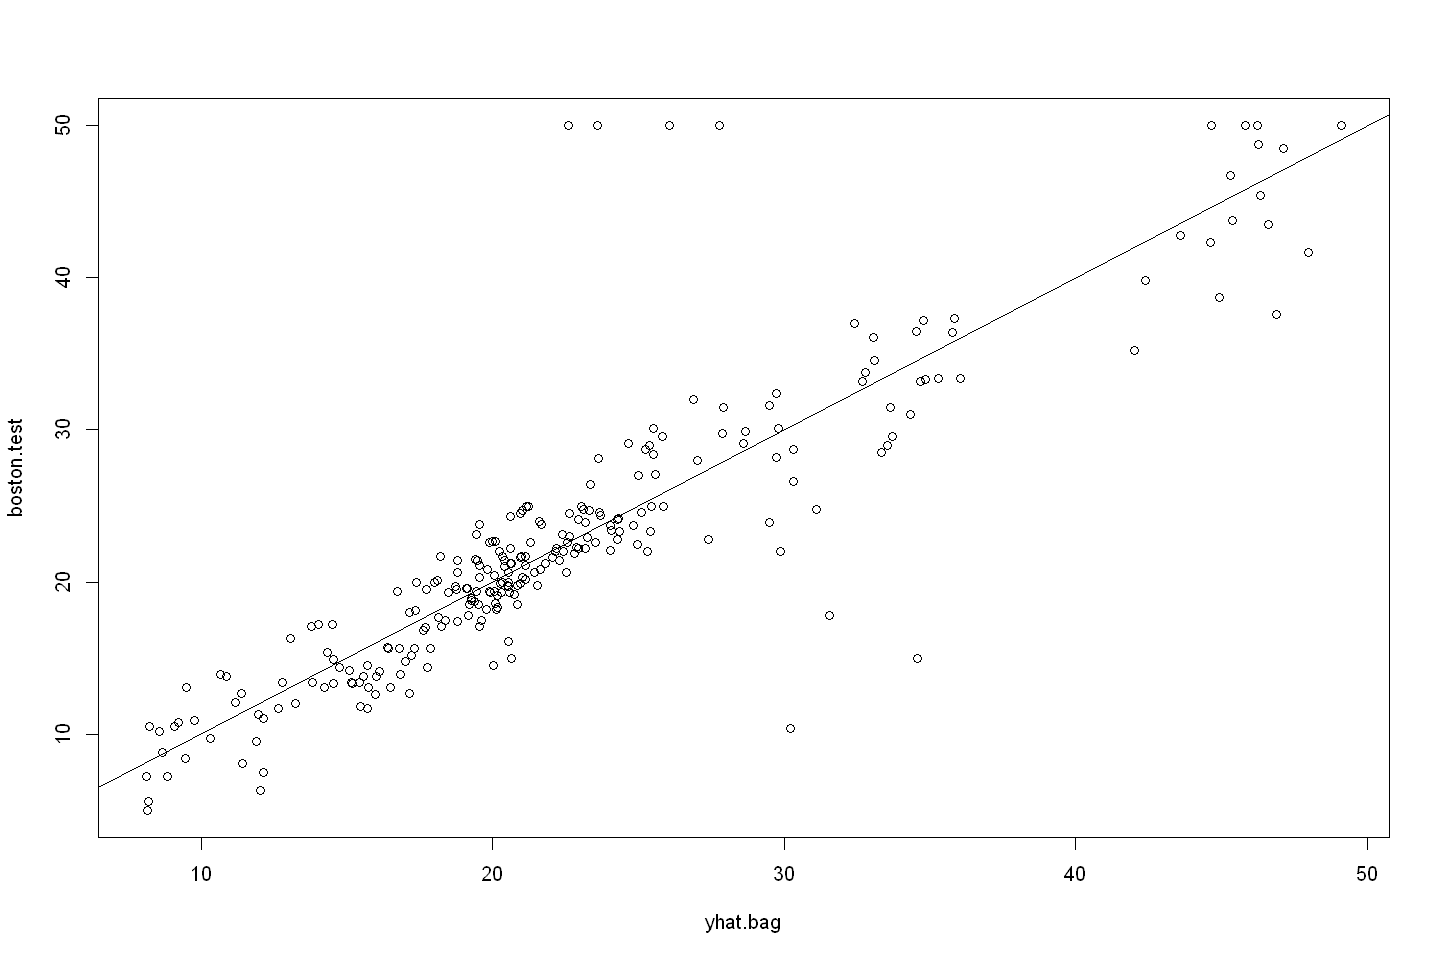

In [56]:
plot(yhat.bag, boston.test)
abline(0, 1)

In [57]:
mean((yhat.bag - boston.test) ^ 2)

[1] 19.81565

In [58]:
set.seed(1)
rf.boston = randomForest(medv ~ ., data = Boston, subset = train, mtry = 6, importance = TRUE)

In [59]:
yhat.rf = predict(rf.boston, newdata = Boston[-train,])
mean((yhat.rf - boston.test) ^ 2)

[1] 16.4081

In [60]:
importance(rf.boston)

,%IncMSE,IncNodePurity
crim,13.732304,1107.67668
zn,4.410510,95.63934
indus,5.670870,443.23264
chas,1.353168,39.59940
nox,16.662050,923.03154
rm,33.368987,7865.44385
age,13.600352,626.64334
dis,11.469812,765.61445
rad,4.417249,108.77438
tax,9.424190,550.22440


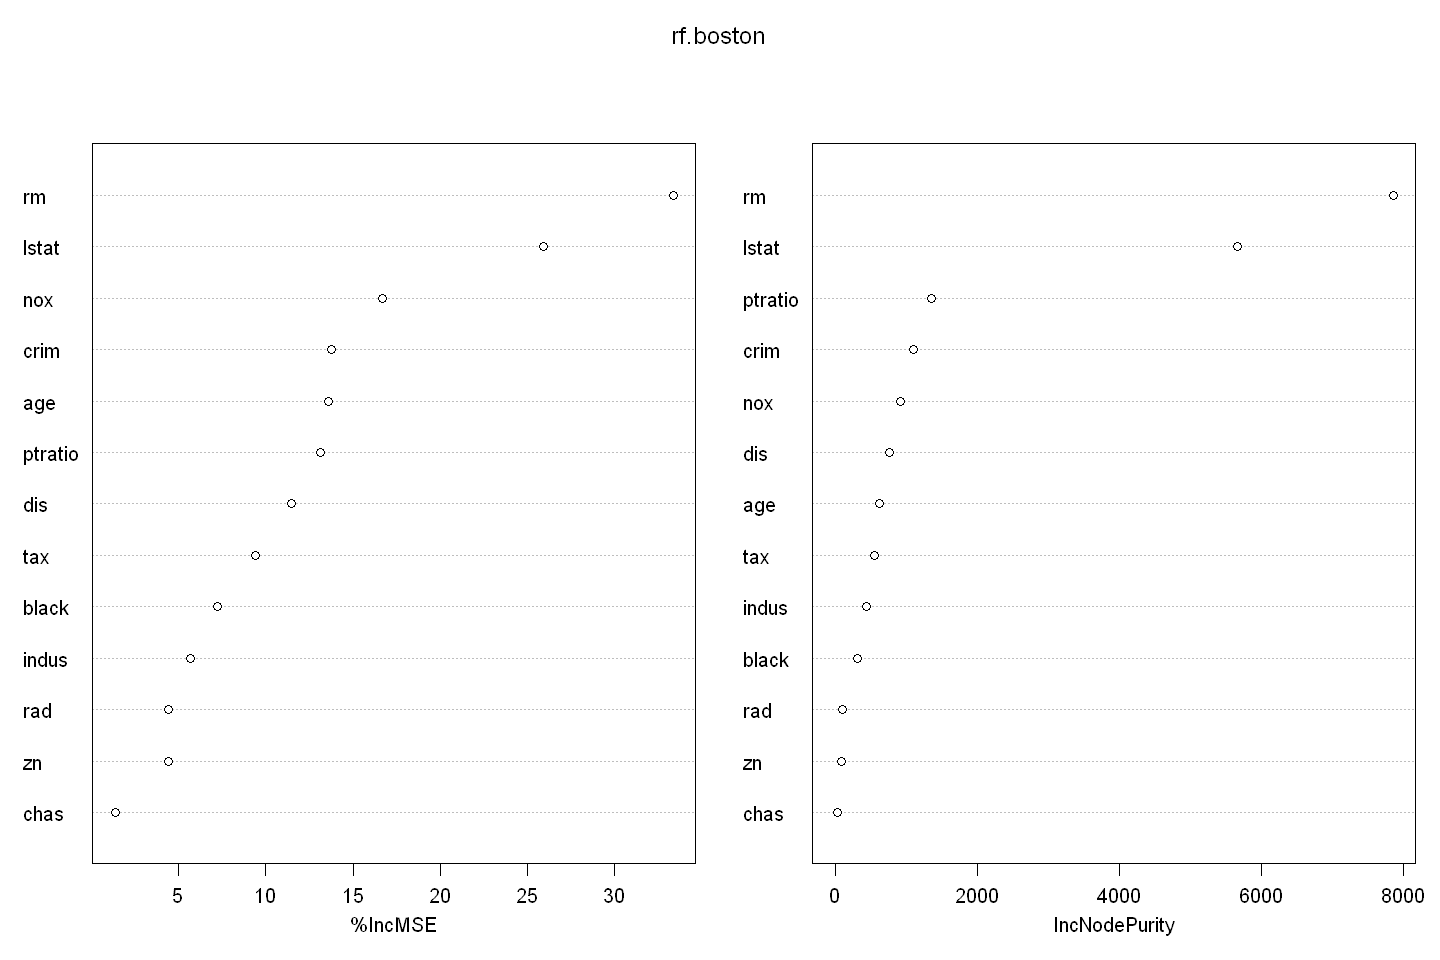

In [61]:
varImpPlot(rf.boston)

# Boosting

In [67]:
train = sample(1:nrow(Boston), nrow(Boston) / 2)
boston.test = Boston[-train, 'medv']

,var,rel.inf
rm,rm,46.8615269
lstat,lstat,26.1040628
dis,dis,6.0532685
crim,crim,4.2004389
age,age,3.3896491
black,black,3.1844877
ptratio,ptratio,2.7761833
nox,nox,2.6256095
chas,chas,1.9415568
tax,tax,1.4933765


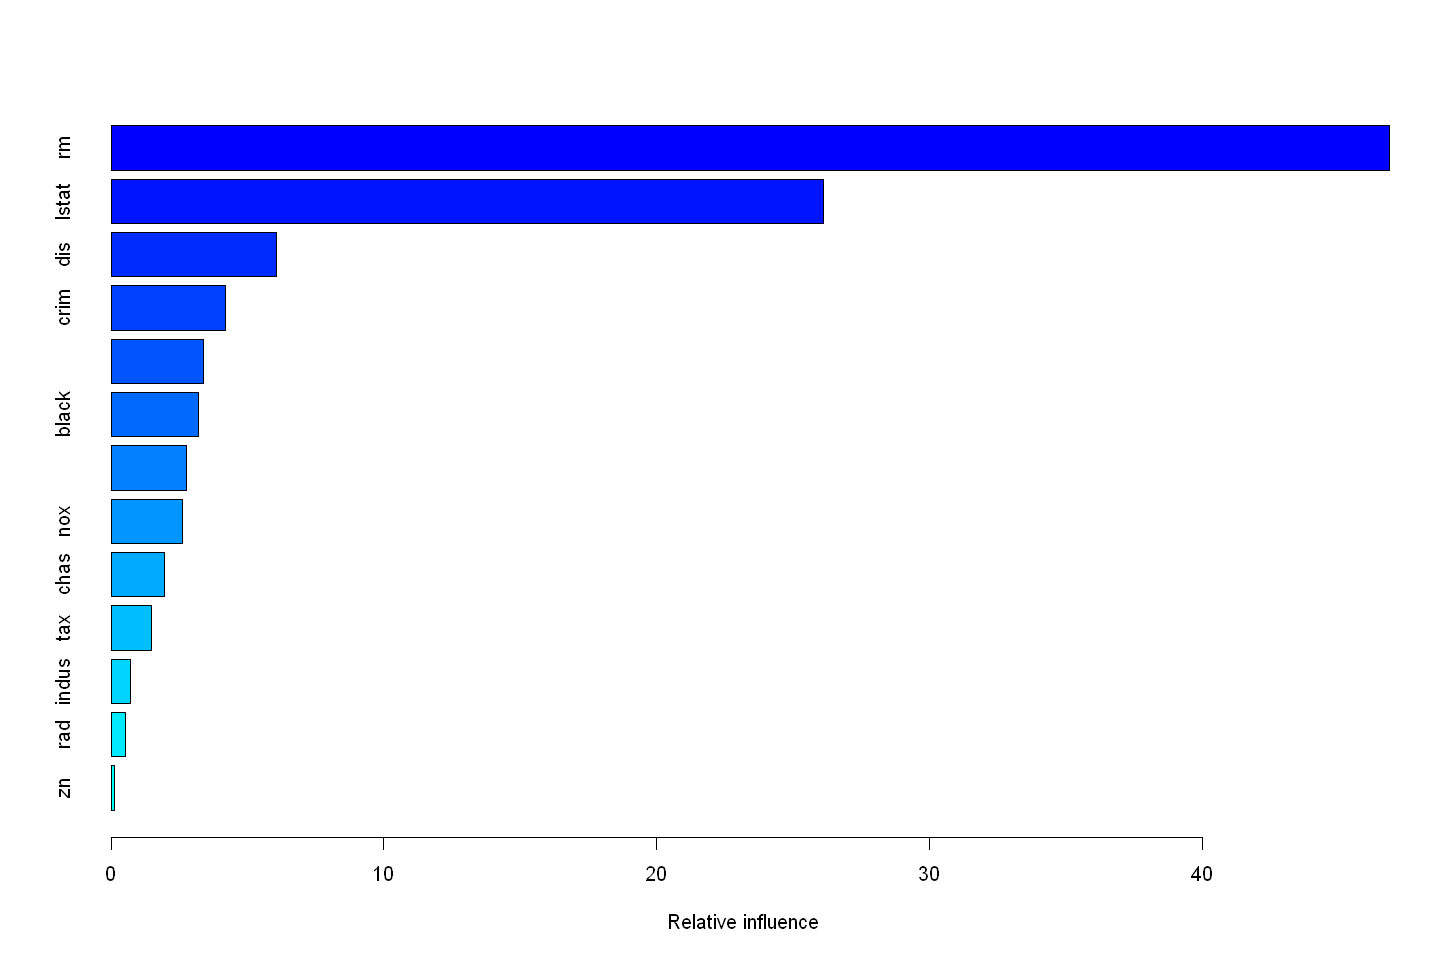

In [68]:
set.seed(1)
boost.boston = gbm(medv ~ ., data = Boston[train,], distribution = 'gaussian', n.trees = 5000, interaction.depth = 4)
summary(boost.boston)

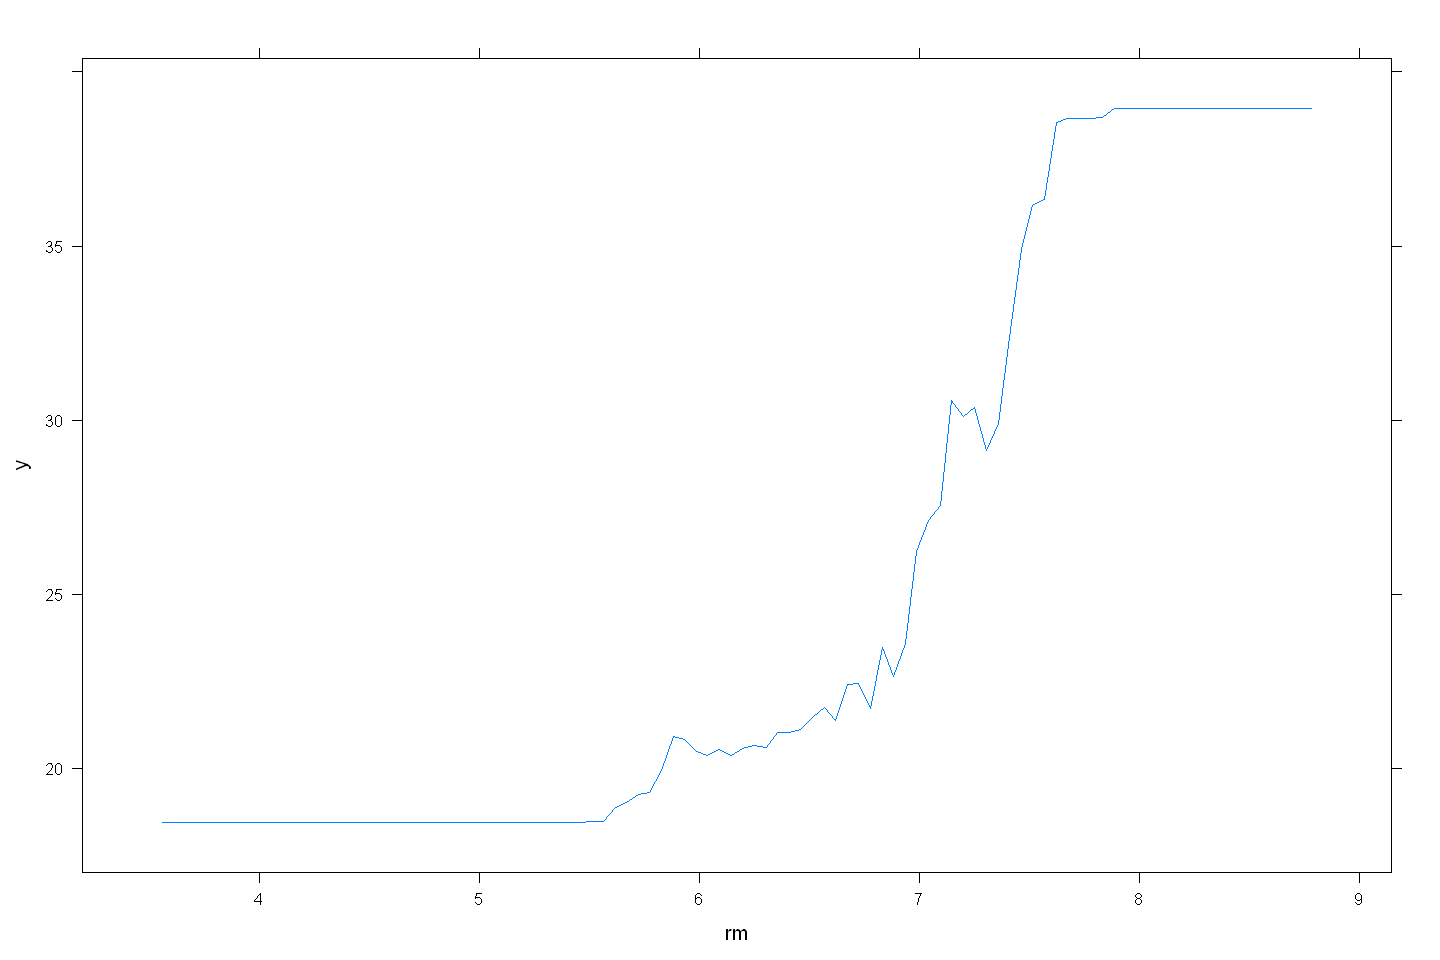

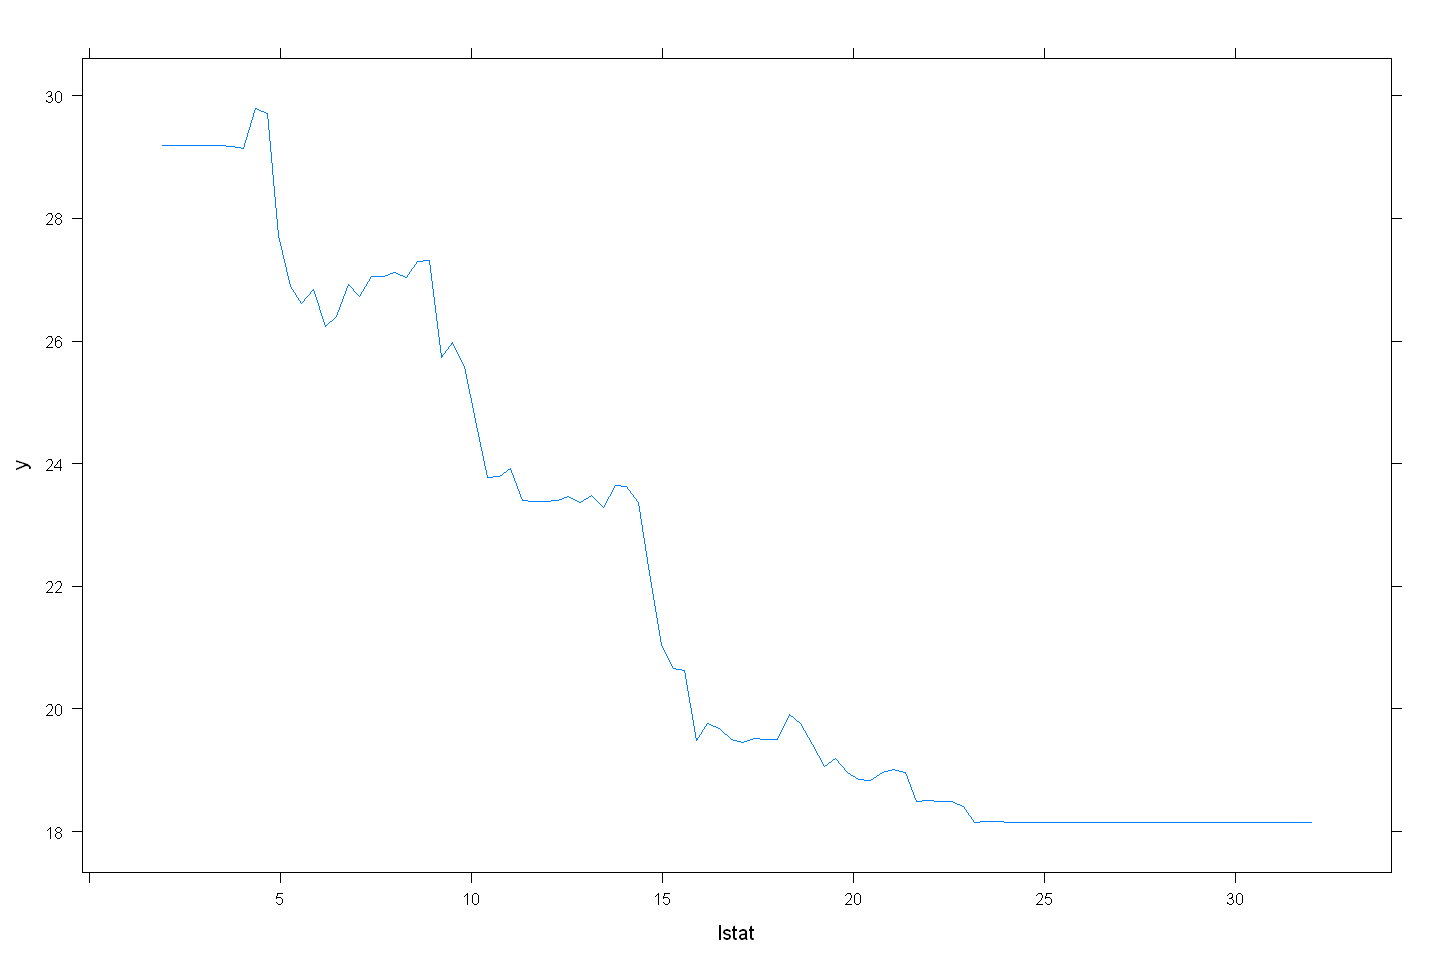

In [69]:
par(mfrow = c(1, 2))
plot(boost.boston, i = 'rm')
plot(boost.boston, i = 'lstat')

In [70]:
yhat.boost = predict(boost.boston, newdata = Boston[-train, ], n.trees = 5000)
mean((yhat.boost - boston.test) ^ 2)

[1] 12.52281

In [71]:
boost.boston = gbm(medv ~ ., data = Boston[train,], distribution = 'gaussian', n.trees = 5000, 
                   interaction.depth = 4, shrinkage = .2, verbose = FALSE)
yhat.boost = predict(boost.boston, newdata = Boston[-train, ], n.trees = 5000)

mean((yhat.boost - boston.test) ^ 2)

[1] 12.59244